In [1]:
import pandas_datareader as pdr
import pandas as pd
import datetime as dt
import os
import numpy as np

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots


/Users/pauldesalvo/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [23]:
df_fruits = pd.DataFrame(np.random.randint(1000,size=(5, 2)), index = ['Apples','Oranges','Bananas','Mangoes','Grapes'], columns=['2018','2019'])

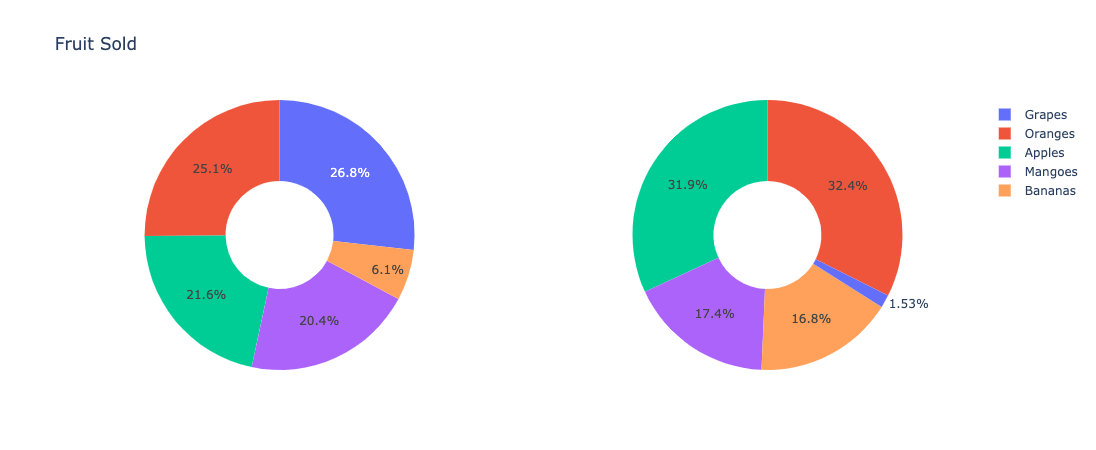

In [24]:
df = df_fruits

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=df.index, values=df['2018'], name="2018"),
              1, 1)
fig.add_trace(go.Pie(labels=df.index, values=df['2019'], name="2019"),
              1, 2)


# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(title_text="Fruit Sold")
    
fig.show()

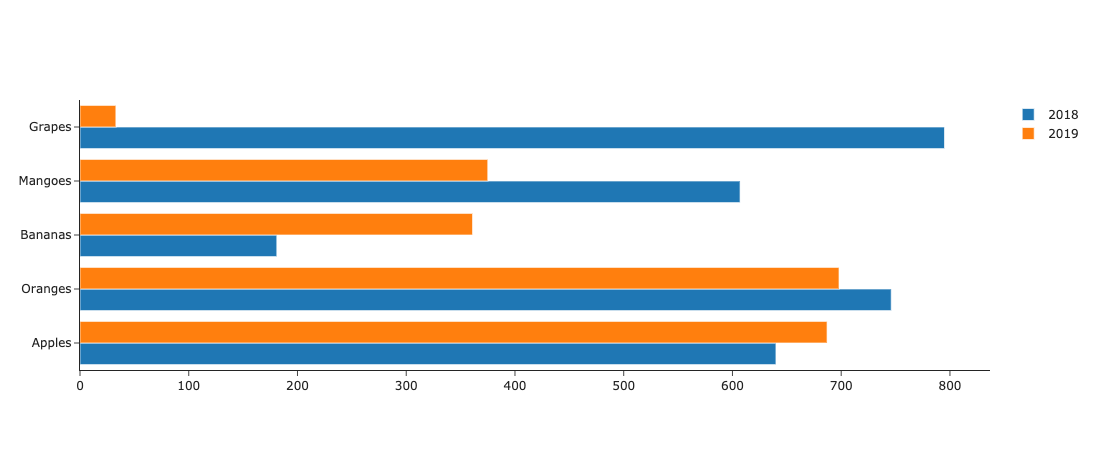

In [25]:
fig2 = go.Figure()

fig2.add_trace(go.Bar(
            x=df['2018'],
            y=df.index,
            name='2018',
            orientation='h'))

fig2.add_trace(go.Bar(
            x=df['2019'],
            y=df.index,
            name='2019',
            orientation='h'))

fig2.update_layout(template='simple_white')

fig2.show()

In [42]:
df_fruits.unstack()#.reset_index()#.rename(columns={"level_0": "Year", "level_1": "Fruit", 0:'Quantity'})

2018  Apples     640
      Oranges    746
      Bananas    181
      Mangoes    607
      Grapes     795
2019  Apples     687
      Oranges    698
      Bananas    361
      Mangoes    375
      Grapes      33
dtype: int64

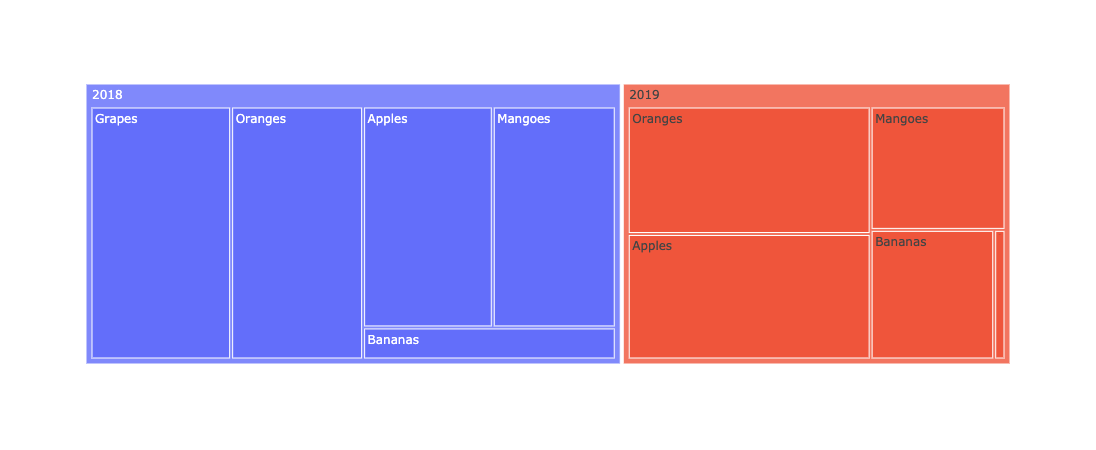

In [43]:
df = df_fruits.unstack().reset_index().rename(columns={"level_0": "Year", "level_1": "Fruit", 0:'Quantity'})

fig3 = px.treemap(df, path=['Year', 'Fruit'], values='Quantity')
fig3.show()

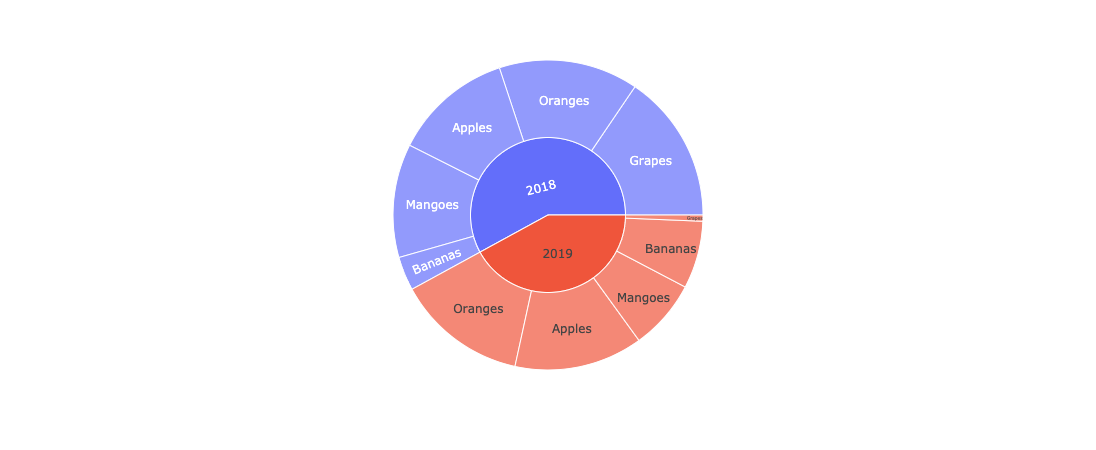

In [44]:
fig4 = px.sunburst(df, path=['Year', 'Fruit'], values='Quantity')
fig4.show()